# Estatísticas das três árvores

In [18]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from matplotlib.colors import Normalize

In [19]:
def plotTreesLines(df, x, y, x_label, y_label, title):
    sns.set_style("whitegrid")

    # Criar a figura
    palette = ["#228B22", "#0047AB", "#D22B2B"]
    plt.figure(figsize=(8, 5))
    sns.lineplot(data=df, x=x, y=y, hue="Tipo_Arvore", palette=palette)

    # Rótulos e título com melhor formatação
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    # Remover as bordas superior e direita
    sns.despine(top=True, right=True)

    # Retirar grade
    plt.grid(False)
    # Ajustar layout
    plt.tight_layout()

    # Mostrar o gráfico
    plt.show()

In [20]:
BST_df = pd.read_csv('bst.csv')
AVL_df = pd.read_csv('avl.csv')
RBT_df = pd.read_csv('rbt.csv')

df = pd.concat([BST_df, AVL_df, RBT_df])
df

,Num_Docs,Altura,Total_Nos,Profundidade_Media,Profundidade_Minima,Max_Desbalanceamento,Tempo_Total_Indexacao,Tempo_Medio_Insercao,Densidade_Arvore,Maior_Galho,Menor_Galho,Total_Comparacoes_Indexacao,Tempo_Maximo_Busca_Amostra,Comparacoes_Total_Busca_Amostra,Tempo_Medio_Busca_Amostra_Por_Palavra,Comparacoes_Medias_Busca_Amostra_Por_Palavra,Tipo_Arvore
0,1,14,129,6.86047,4,0,0.038,0.000295,0.003937,14,4,1184,0.001,1288,0.000011,7.27684,BST
1,2,16,205,7.84390,4,0,0.047,0.000229,0.001564,16,4,2298,0.001,2488,0.000007,8.18421,BST
2,3,21,574,10.37280,5,0,0.134,0.000233,0.000137,21,5,12474,0.001,9751,0.000001,9.75100,BST
3,4,21,604,10.51160,5,0,0.135,0.000224,0.000144,21,5,13291,0.001,9699,0.000001,9.69900,BST
4,5,21,704,10.88490,5,0,0.156,0.000222,0.000168,21,5,16692,0.000,10137,0.000000,10.13700,BST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,16,16972,12.46690,10,7,621.947,0.036645,0.129487,16,10,4551240,0.153,11014,0.001113,11.01400,RBT
996,997,16,16977,12.46740,10,7,622.414,0.036662,0.129525,16,10,4554619,0.007,11097,0.000498,11.09700,RBT
997,998,16,16980,12.46770,10,7,624.764,0.036794,0.129548,16,10,4565086,0.024,11013,0.000857,11.01300,RBT
998,999,16,16984,12.46810,10,7,625.459,0.036826,0.129579,16,10,4569072,0.008,11133,0.000872,11.13300,RBT


---

### Crescimento Estrutural
#### Altura da Árvore

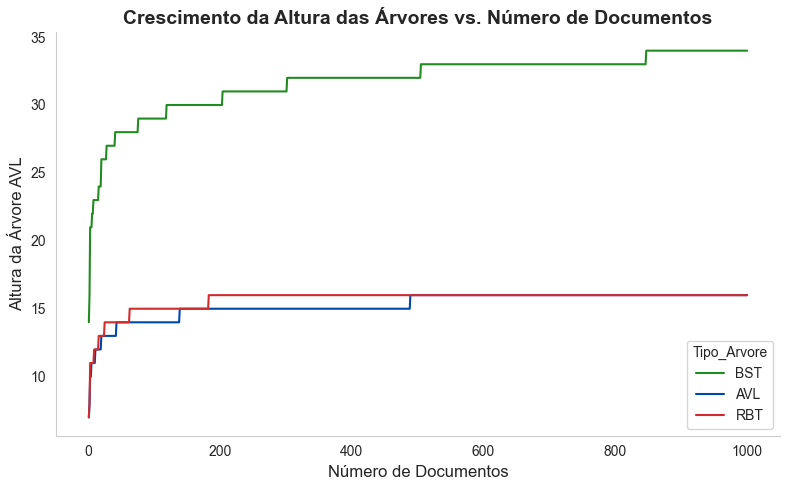

In [21]:
plotTreesLines(df, "Num_Docs", "Altura", "Número de Documentos", "Altura da Árvore AVL", "Crescimento da Altura das Árvores vs. Número de Documentos")

---

#### Profundidade Média

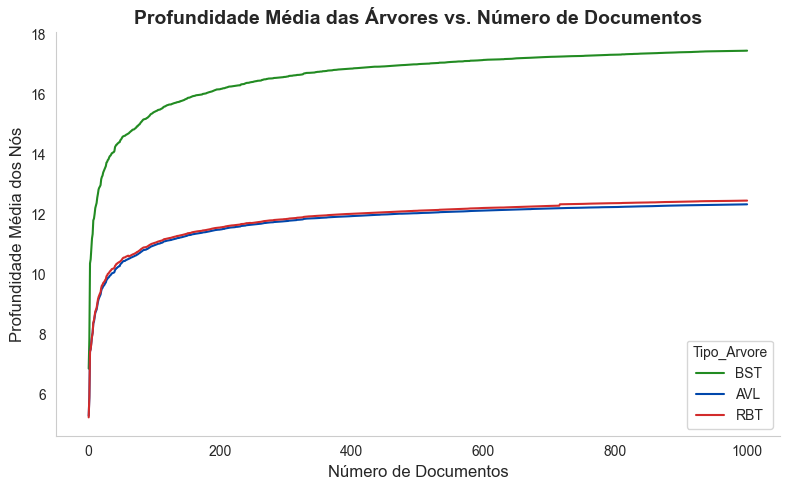

In [22]:
plotTreesLines(df, "Num_Docs", "Profundidade_Media", "Número de Documentos", "Profundidade Média dos Nós", "Profundidade Média das Árvores vs. Número de Documentos")

---

#### Comparação da Profundidade Média de cada árvore com a escala logaritmica 

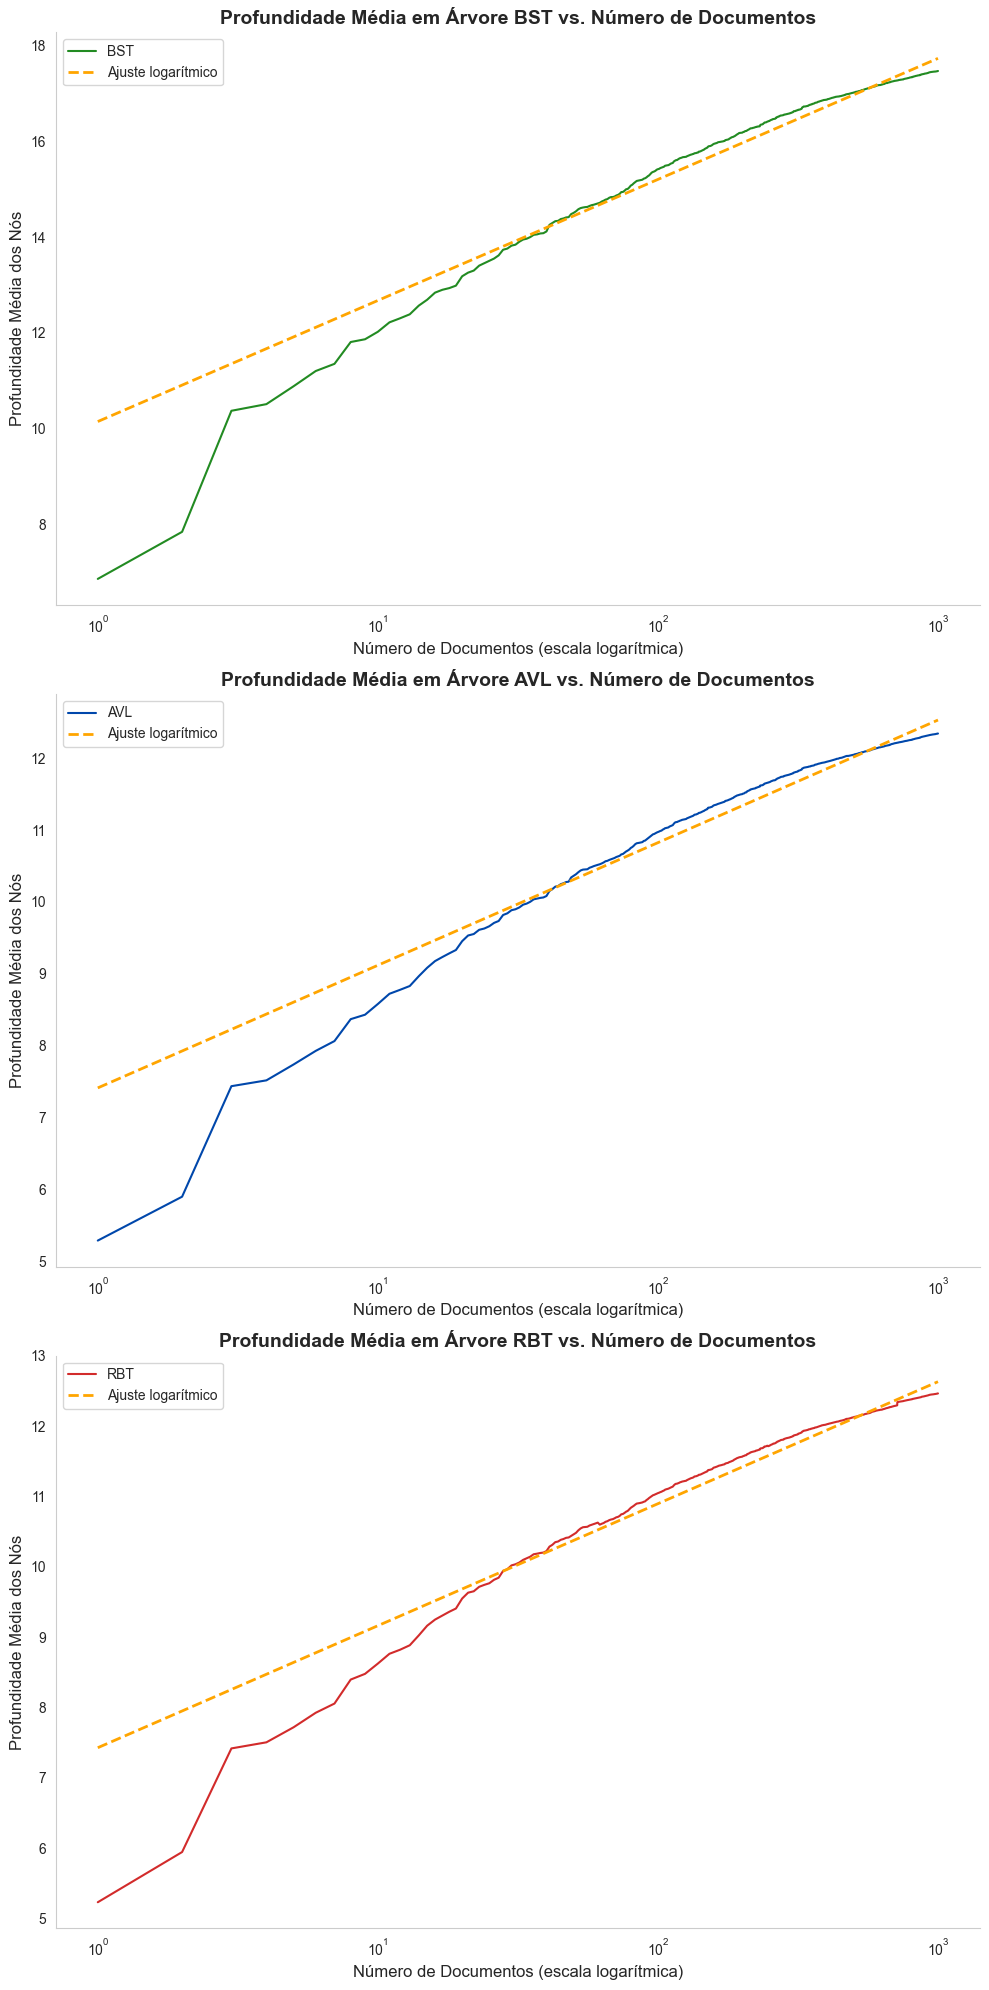

In [23]:

# Estilo visual
sns.set_style("whitegrid")

plt.figure(figsize=(10,20))

# Grafico da BST
plt.subplot(3,1,1) 
# Dados
n_docs = df[df['Tipo_Arvore'] == 'BST']['Num_Docs']
profundidade_media = df[df['Tipo_Arvore'] == 'BST']['Profundidade_Media']

# Ajuste logarítmico (modelo: y = a * log(x) + b)
log_n_docs = np.log(n_docs)
coef = np.polyfit(log_n_docs, profundidade_media, deg=1)
ajuste = coef[0] * log_n_docs + coef[1]


plt.plot(n_docs, profundidade_media, color='#228B22', label='BST')
plt.plot(n_docs, ajuste, linestyle='--', color='orange', linewidth=2, label='Ajuste logarítmico')

# Eixo x em escala logarítmica para realçar a relação
plt.xscale('log')

# Rótulos e título
plt.xlabel('Número de Documentos (escala logarítmica)', fontsize=12)
plt.ylabel('Profundidade Média dos Nós', fontsize=12)
plt.title('Profundidade Média em Árvore BST vs. Número de Documentos', fontsize=14, fontweight='bold')
plt.legend()
sns.despine(top=True, right=True)

# Layout ajustado
plt.tight_layout()
plt.grid(False)

# Grafico da AVL
plt.subplot(3,1,2) 
# Dados
n_docs = df[df['Tipo_Arvore'] == 'AVL']['Num_Docs']
profundidade_media = df[df['Tipo_Arvore'] == 'AVL']['Profundidade_Media']

# Ajuste logarítmico (modelo: y = a * log(x) + b)
log_n_docs = np.log(n_docs)
coef = np.polyfit(log_n_docs, profundidade_media, deg=1)
ajuste = coef[0] * log_n_docs + coef[1]


plt.plot(n_docs, profundidade_media, color='#0047AB', label='AVL')
plt.plot(n_docs, ajuste, linestyle='--', color='orange', linewidth=2, label='Ajuste logarítmico')

# Eixo x em escala logarítmica para realçar a relação
plt.xscale('log')

# Rótulos e título
plt.xlabel('Número de Documentos (escala logarítmica)', fontsize=12)
plt.ylabel('Profundidade Média dos Nós', fontsize=12)
plt.title('Profundidade Média em Árvore AVL vs. Número de Documentos', fontsize=14, fontweight='bold')
plt.legend()
sns.despine(top=True, right=True)

# Layout ajustado
plt.tight_layout()
plt.grid(False)

# Grafico da RBT
plt.subplot(3,1,3) 
# Dados
n_docs = df[df['Tipo_Arvore'] == 'RBT']['Num_Docs']
profundidade_media = df[df['Tipo_Arvore'] == 'RBT']['Profundidade_Media']

# Ajuste logarítmico (modelo: y = a * log(x) + b)
log_n_docs = np.log(n_docs)
coef = np.polyfit(log_n_docs, profundidade_media, deg=1)
ajuste = coef[0] * log_n_docs + coef[1]


plt.plot(n_docs, profundidade_media, color='#D22B2B', label='RBT')
plt.plot(n_docs, ajuste, linestyle='--', color='orange', linewidth=2, label='Ajuste logarítmico')

# Eixo x em escala logarítmica para realçar a relação
plt.xscale('log')

# Rótulos e título
plt.xlabel('Número de Documentos (escala logarítmica)', fontsize=12)
plt.ylabel('Profundidade Média dos Nós', fontsize=12)
plt.title('Profundidade Média em Árvore RBT vs. Número de Documentos', fontsize=14, fontweight='bold')
plt.legend()
sns.despine(top=True, right=True)

# Layout ajustado
plt.tight_layout()
plt.grid(False)
# Mostrar gráfico
plt.show()


---
========================= Abaixo tem apenas dados da AVL =========================

---

O gráfico apresentado mostra a relação entre o "Número de Documentos" (em escala logarítmica) e a "Profundidade Média dos Nós" nas árvores.

**Análise:**

1.  **Dados Observados (Pontos Azuis):** Os pontos azuis representam os dados coletados, mostrando a profundidade média dos nós para diferentes números de documentos. Percebe-se que, à medida que o número de documentos aumenta, a profundidade média dos nós também aumenta.

2.  **Linha Conectando os Pontos (Linha Roxa Clara):** Essa linha mostra a trajetória dos dados observados. No início, para um número muito pequeno de documentos, a profundidade média dos nós tem um comportamento mais irregular e com saltos maiores. No entanto, à medida que o número de documentos cresce, a profundidade média dos nós se torna mais suave e previsível.

3.  **Ajuste Logarítmico (Linha Laranja Tracejada):** Uma linha de ajuste logarítmico foi sobreposta aos dados. Essa linha representa um modelo do tipo $y = a \cdot \log(x) + b$, onde $y$ é a profundidade média e $x$ é o número de documentos.

4.  **Qualidade do Ajuste Logarítmico:**
    * Para um número maior de documentos (a partir de aproximadamente $10^1$ ou 10 documentos), o ajuste logarítmico parece se encaixar muito bem aos dados observados. A linha laranja tracejada acompanha de perto os pontos azuis, indicando que a profundidade média dos nós em uma árvore AVL cresce de forma logarítmica com o número de documentos.
    * Para um número muito pequeno de documentos (abaixo de 10), o ajuste logarítmico não é tão preciso. Há uma diferença notável entre os dados observados e a linha de ajuste, especialmente na porção inicial do gráfico. Isso é esperado, pois o comportamento de uma estrutura de dados para um volume muito pequeno de elementos pode não seguir perfeitamente a complexidade assintótica que se aplica a volumes maiores.

**Conclusão:**

O gráfico ilustra um conceito fundamental sobre árvores AVL: sua altura (e, consequentemente, a profundidade média dos nós) cresce de forma logarítmica com o número de elementos. Isso é uma das principais vantagens das árvores AVL, pois garante que as operações (inserção, busca, remoção) tenham uma complexidade de tempo logarítmica, mesmo no pior caso, devido ao seu auto-balanceamento.

O ajuste logarítmico confirma essa característica teórica para um volume significativo de documentos, demonstrando empiricamente o desempenho eficiente das árvores AVL em termos de profundidade. As pequenas discrepâncias para poucos documentos são normalmente irrelevantes em cenários de uso prático, onde as árvores AVL são aplicadas para gerenciar grandes volumes de dados.

---

#### Profundidade Mínima

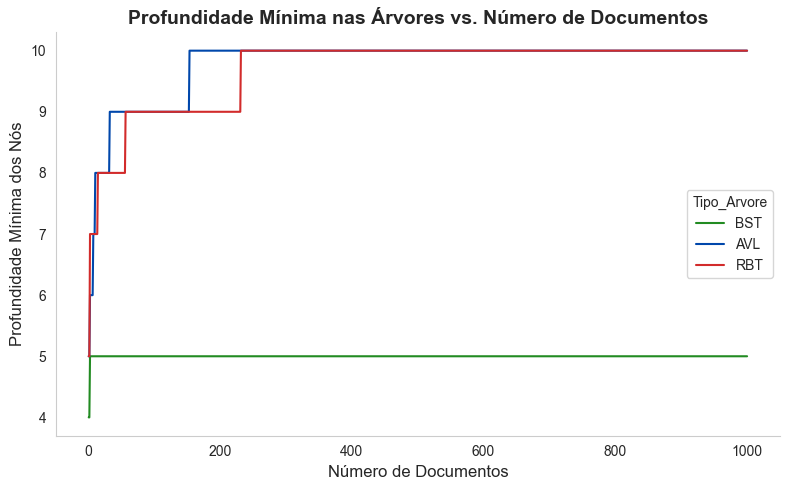

In [24]:
plotTreesLines(df, 'Num_Docs', 'Profundidade_Minima', 'Número de Documentos', 'Profundidade Mínima dos Nós', 'Profundidade Mínima nas Árvores vs. Número de Documentos')

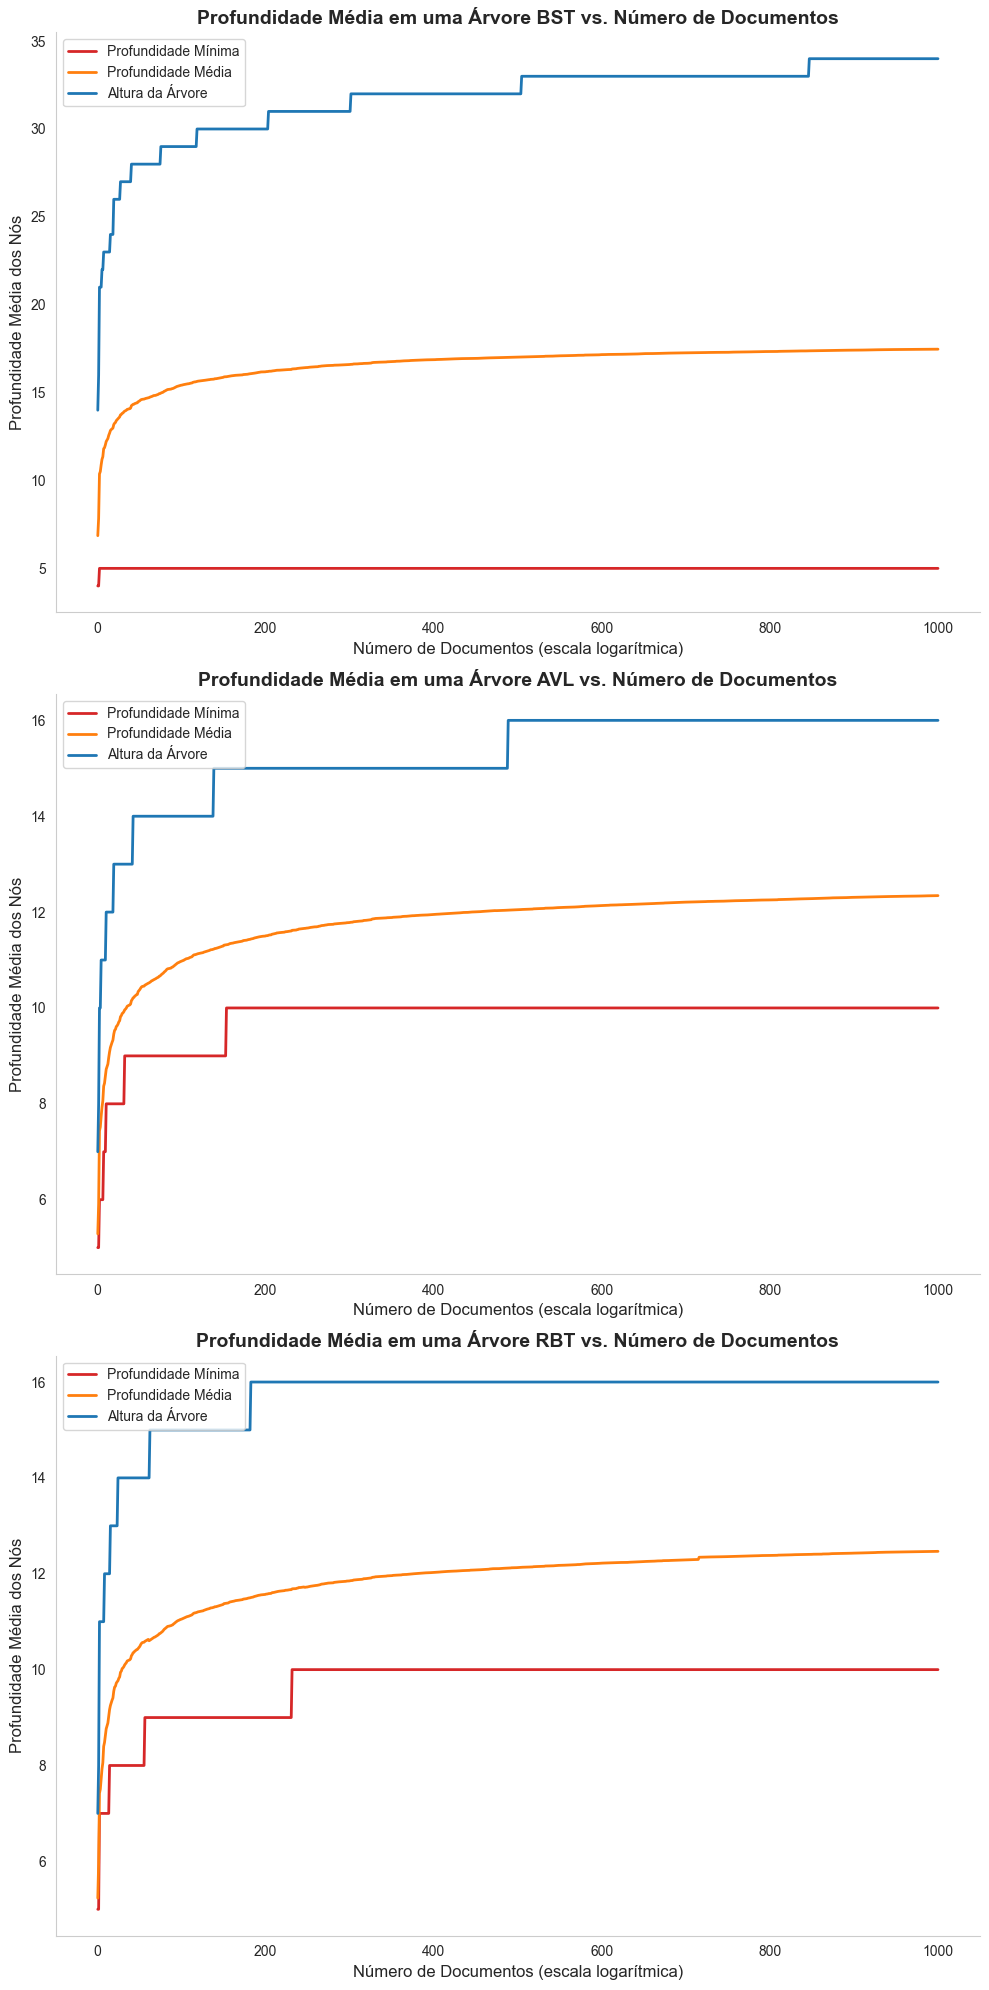

In [28]:
# Estilo visual
sns.set_style("whitegrid")

plt.figure(figsize=(10,20))

# Grafico da BST
plt.subplot(3,1,1) 

# Dados
n_docs = df[df['Tipo_Arvore'] == 'BST']['Num_Docs']
altura = df[df['Tipo_Arvore'] == 'BST']['Altura']
prof_min = df[df['Tipo_Arvore'] == 'BST']['Profundidade_Minima']
prof_media = df[df['Tipo_Arvore'] == 'BST']['Profundidade_Media']

# Plotagens com cores distintas
plt.plot(n_docs, prof_min, linestyle='-', color='#d62728', label='Profundidade Mínima', linewidth=2, markersize=5)
plt.plot(n_docs, prof_media, linestyle='-', color='#ff7f0e', label='Profundidade Média', linewidth=2, markersize=5)
plt.plot(n_docs, altura,  linestyle='-', color='#1f77b4', label='Altura da Árvore', linewidth=2, markersize=5)

# Rótulos e título
plt.xlabel('Número de Documentos (escala logarítmica)', fontsize=12)
plt.ylabel('Profundidade Média dos Nós', fontsize=12)
plt.title('Profundidade Média em uma Árvore BST vs. Número de Documentos', fontsize=14, fontweight='bold')

plt.legend()
sns.despine(top=True, right=True)
plt.tight_layout()
plt.grid(False)

# Grafico da AVL
plt.subplot(3,1,2) 

# Dados
n_docs = df[df['Tipo_Arvore'] == 'AVL']['Num_Docs']
altura = df[df['Tipo_Arvore'] == 'AVL']['Altura']
prof_min = df[df['Tipo_Arvore'] == 'AVL']['Profundidade_Minima']
prof_media = df[df['Tipo_Arvore'] == 'AVL']['Profundidade_Media']

# Plotagens com cores distintas
plt.plot(n_docs, prof_min, linestyle='-', color='#d62728', label='Profundidade Mínima', linewidth=2, markersize=5)
plt.plot(n_docs, prof_media, linestyle='-', color='#ff7f0e', label='Profundidade Média', linewidth=2, markersize=5)
plt.plot(n_docs, altura,  linestyle='-', color='#1f77b4', label='Altura da Árvore', linewidth=2, markersize=5)

# Rótulos e título
plt.xlabel('Número de Documentos (escala logarítmica)', fontsize=12)
plt.ylabel('Profundidade Média dos Nós', fontsize=12)
plt.title('Profundidade Média em uma Árvore AVL vs. Número de Documentos', fontsize=14, fontweight='bold')

plt.legend()
sns.despine(top=True, right=True)
plt.tight_layout()
plt.grid(False)

# Grafico da RBT
plt.subplot(3,1,3) 

# Dados
n_docs = df[df['Tipo_Arvore'] == 'RBT']['Num_Docs']
altura = df[df['Tipo_Arvore'] == 'RBT']['Altura']
prof_min = df[df['Tipo_Arvore'] == 'RBT']['Profundidade_Minima']
prof_media = df[df['Tipo_Arvore'] == 'RBT']['Profundidade_Media']

# Plotagens com cores distintas
plt.plot(n_docs, prof_min, linestyle='-', color='#d62728', label='Profundidade Mínima', linewidth=2, markersize=5)
plt.plot(n_docs, prof_media, linestyle='-', color='#ff7f0e', label='Profundidade Média', linewidth=2, markersize=5)
plt.plot(n_docs, altura,  linestyle='-', color='#1f77b4', label='Altura da Árvore', linewidth=2, markersize=5)

# Rótulos e título
plt.xlabel('Número de Documentos (escala logarítmica)', fontsize=12)
plt.ylabel('Profundidade Média dos Nós', fontsize=12)
plt.title('Profundidade Média em uma Árvore RBT vs. Número de Documentos', fontsize=14, fontweight='bold')

plt.legend()
sns.despine(top=True, right=True)
plt.tight_layout()
plt.grid(False)
# Mostrar gráfico
plt.show()


Altura: deve crescer de forma logarítmica, mas sempre maior que as demais curvas.

Profundidade Média: deve crescer mais suavemente, acompanhando parcialmente a altura.

Profundidade Mínima: geralmente cresce devagar — se for constante, indica subárvores rasas.

Como houve saltos ou quebras de padrão, isso pode indicar inserções que impactaram partes da árvore mais rasas.

---

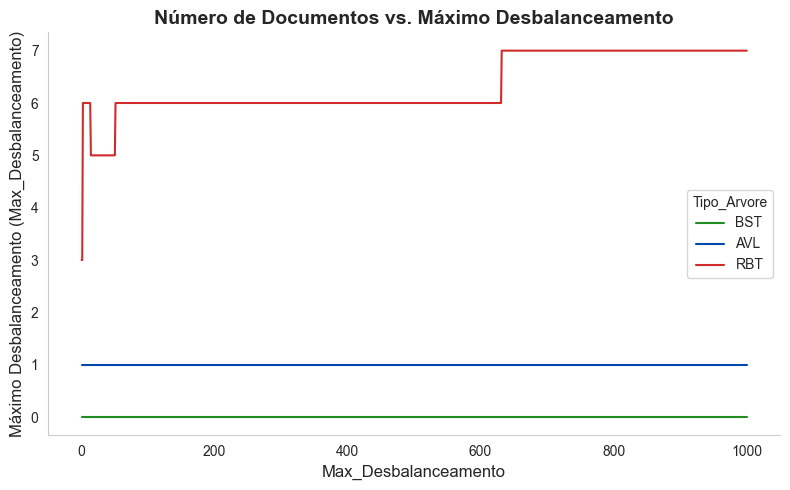

In [29]:
plotTreesLines(df, 'Num_Docs', 'Max_Desbalanceamento', 'Max_Desbalanceamento', 'Máximo Desbalanceamento (Max_Desbalanceamento)', 'Número de Documentos vs. Máximo Desbalanceamento')

Na árvore AVL, o máximo desbalanceamento (diferença de altura entre subárvores) não passa de 1, porque essa é justamente a propriedade da AVL para garantir o balanceamento.

---

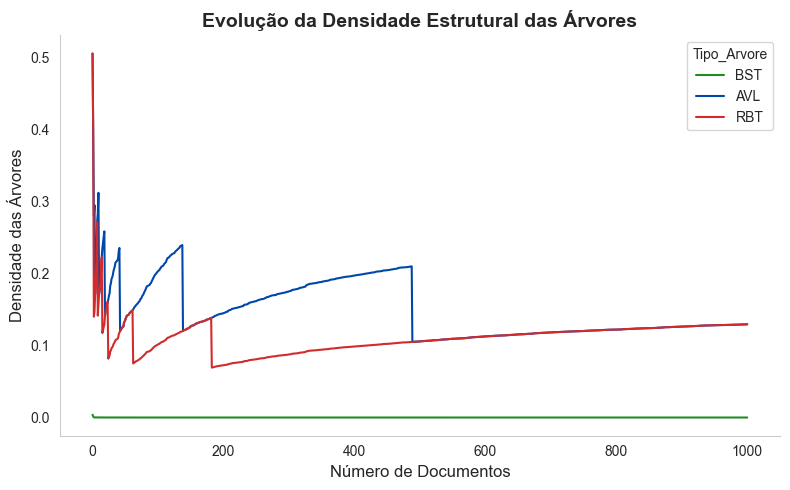

In [30]:
plotTreesLines(df, 'Num_Docs', 'Densidade_Arvore', 'Número de Documentos', 'Densidade das Árvores', 'Evolução da Densidade Estrutural das Árvores')

---

#### Razão Maior/Menor Galho

In [31]:
# Calcular a razão Maior_Galho / Menor_Galho
# Adiciona um pequeno valor ao denominador para evitar divisão por zero, caso ocorra
df['Razao_Galhos'] = df['Maior_Galho'] / (df['Menor_Galho'] + 1e-9)

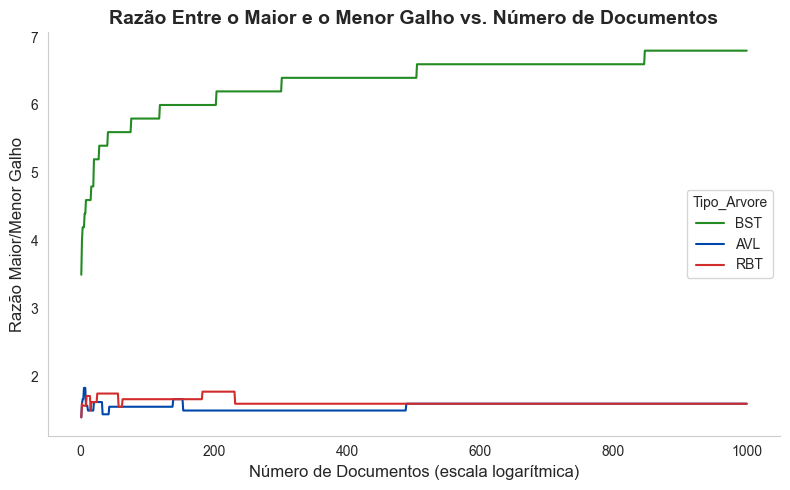

In [32]:
plotTreesLines(df, 'Num_Docs', 'Razao_Galhos', 'Número de Documentos (escala logarítmica)', 'Razão Maior/Menor Galho', 'Razão Entre o Maior e o Menor Galho vs. Número de Documentos')

---

#### Desempenho Temporal

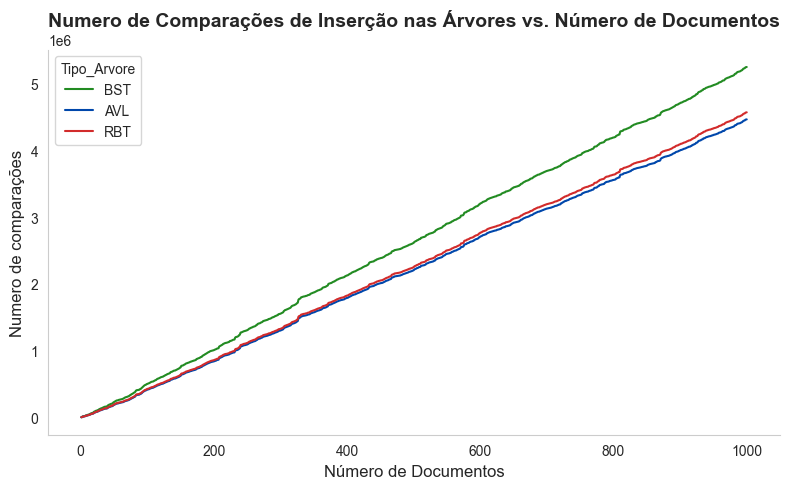

In [33]:
plotTreesLines(df, 'Num_Docs', 'Total_Comparacoes_Indexacao', 'Número de Documentos', 'Numero de comparações', 'Numero de Comparações de Inserção nas Árvores vs. Número de Documentos')

---